# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
# Your code here
def alpha_func(D, idx):
    sepal_width = D.loc[idx, 'Sepal.Width']
    sepal_length = D.loc[idx, 'Sepal.Length']
    
    alpha = sepal_width / (sepal_length ** 2)
    
    return alpha

Test the code below

In [4]:
alpha_func(df, range(100))

0     0.134564
1     0.124948
2     0.144862
3     0.146503
4     0.144000
        ...   
95    0.092336
96    0.089258
97    0.075442
98    0.096117
99    0.086180
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [5]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    0.094444
63    0.077936
51    0.078125
26    0.136000
30    0.134549
        ...   
62    0.061111
4     0.144000
8     0.149793
37    0.149938
83    0.075000
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [ ]:
#(iii) Calculating the average length of iris' sepals gives us one number, but it might not show us all the ways the lengths could be different.

In [7]:
# Add your code here to set the seed
def boot_SE(data, num_samples=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(data)
    means = np.zeros(num_samples)
    
    for i in range(num_samples):
        sample = rng.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
        
    boot_se = np.std(means, ddof=1)  # ddof=1 for sample standard deviation

    return boot_se


In [8]:
# Set seed for reproducibility
np.random.seed(0)

# Compute bootstrap standard error for Sepal.Length
sepal_length_data = df['Sepal.Length']
bootstrap_se = boot_SE(sepal_length_data)

print(f"Bootstrap Standard Error (SE) of Sepal.Length: {bootstrap_se:.4f}")

Bootstrap Standard Error (SE) of Sepal.Length: 0.0665


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [9]:
# Your code here
def bootstrap_alpha_estimate(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(D)
    alpha_estimates = np.zeros(B)
    
    for b in range(B):
        bootstrap_indices = rng.choice(n, size=n, replace=True)
        bootstrap_df = D.iloc[bootstrap_indices].reset_index(drop=True)
        
        # Calculate alpha for the bootstrap sample
        alpha_estimate = alpha_func(bootstrap_df, range(len(bootstrap_df)))
        alpha_estimates[b] = np.mean(alpha_estimate)
    
    alpha_mean = np.mean(alpha_estimates)
    alpha_se = np.std(alpha_estimates, ddof=1)  # Standard error of the mean
    
    return alpha_mean, alpha_se

# Set seed for reproducibility
np.random.seed(0)

# Compute alpha estimate with B = 1000
alpha_mean, alpha_se = bootstrap_alpha_estimate(df, B=1000)

print(f"Bootstrap Mean Alpha Estimate: {alpha_mean:.4f}")
print(f"Bootstrap Standard Error (SE) of Alpha Estimate: {alpha_se:.4f}")

Bootstrap Mean Alpha Estimate: 0.0955
Bootstrap Standard Error (SE) of Alpha Estimate: 0.0026


_(vi)_ What is the original mean value of `Sepal.Length`?

In [11]:
# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()

print(f"The original mean value of Sepal.Length is: {original_mean_sepal_length:.4f}")


The original mean value of Sepal.Length is: 5.8433


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [12]:
# Add your code here
def bootstrap_sepal_length(df, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(df)
    boot_se_samples = np.zeros(B)
    
    for b in range(B):
        bootstrap_indices = rng.choice(n, size=n, replace=True)
        boot_se_samples[b] = np.mean(df.iloc[bootstrap_indices]['Sepal.Length'])
    
    boot_mean = np.mean(boot_se_samples)
    boot_std = np.std(boot_se_samples, ddof=1)  # Sample standard deviation
    
    return boot_mean, boot_std, boot_se_samples

# Set seed for reproducibility
np.random.seed(0)

# Perform bootstrapping for Sepal.Length
boot_mean, boot_std, boot_se_samples = bootstrap_sepal_length(df)

# Calculate original mean of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()

# Calculate range of bootstrapped samples
t_range = np.ptp(boot_se_samples)

# Print results
print(f"Original Mean Sepal.Length: {original_mean_sepal_length:.4f}")
print(f"Bootstrapped Mean Sepal.Length: {boot_mean:.4f}")
print(f"Bootstrapped Standard Deviation: {boot_std:.4f}")
print(f"Bootstrapped Range (t_range): {t_range:.4f}")

Original Mean Sepal.Length: 5.8433
Bootstrapped Mean Sepal.Length: 5.8423
Bootstrapped Standard Deviation: 0.0665
Bootstrapped Range (t_range): 0.3873


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [13]:
# Add your code here
# Function to compute 95% confidence interval
def compute_confidence_interval(data, alpha=0.05):
    lower_bound = np.percentile(data, 100 * (alpha / 2))
    upper_bound = np.percentile(data, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

In [14]:
# Set seed for reproducibility
np.random.seed(0)

# Perform bootstrapping for Sepal.Length
boot_mean, boot_std, boot_se_samples = bootstrap_sepal_length(df)

# Compute 95% confidence interval for the mean
lower_bound, upper_bound = compute_confidence_interval(boot_se_samples, alpha=0.05)

# Print results
print(f"Bootstrapped Mean Sepal.Length: {boot_mean:.4f}")
print(f"95% Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")

Bootstrapped Mean Sepal.Length: 5.8423
95% Confidence Interval: [5.7186, 5.9747]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

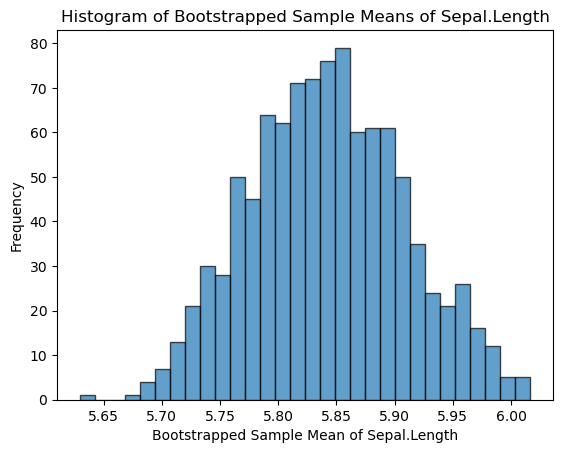

In [15]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_se_samples, bins=30, edgecolor='black', alpha=0.7)

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Sample Means of Sepal.Length')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Bootstrapped Sample Mean of Sepal.Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here
#Let's use the average length of sepals we found from measuring iris flowers. This average tells us how long most sepals are. With this information, we can plan how much space each type of iris flower needs on our shipment. By doing this, we can make sure we use the cargo space efficiently and fit as many flowers as possible, which helps us make the most profit from each shipment.


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
